In [194]:
from generator import generate_wiener_diff
import matplotlib.pyplot as plt
import numpy as np

In [200]:
d = 0.00000000001
n = 100
white_noise = generate_wiener_diff(d, n)

s = 0.5     # Fractionality

In [201]:
z_0 = 1.1**2
z_list = [z_0]

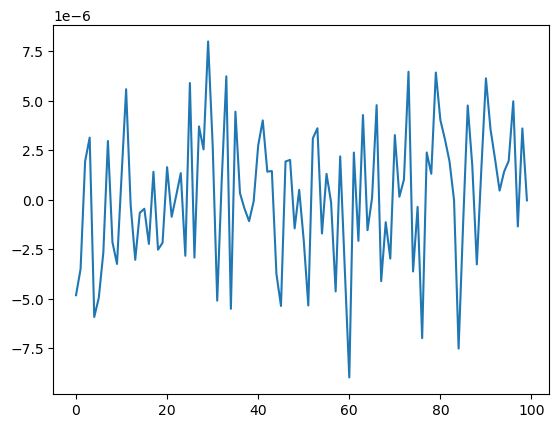

In [203]:
for w in white_noise:
    z = z_list[-1]

    z_tmp = ((1 - 2*s)/2*z)*d + w
    z_list.append(z_tmp)

plt.plot(range(len(z_list[1:])), z_list[1:])

In [212]:
def gamma(x, y):
    return (1 - 2*s)/(x**2 + y**2 - 1)

def delta():
    return 1

def beta(x, y):
    one_coeff = delta()/(2*x + 2*y)
    one = np.ones((2, 1))                       # Particular sol

    lvl = 0.5*np.array([[2*y], [-2*x]])         # Homogenous sol with C_beta = 0.5

    return one_coeff*one + lvl

def gamma_tilde(x, y):
    coeff = 0.5*(delta()**2)/(2*x + 2*y)

    hess_mult = np.ones((1, 2)) @ np.array([[2, 0], [0, 2]]) @ np.ones((2, 1))

    return gamma(x, y) - coeff*hess_mult

def alpha(x, y):
    part_coeff = gamma_tilde(x, y)/(2*x + 2*y)
    part_ones = np.ones((2, 1))

    hom_beta = -0.5*(0.5**2)*np.array([[0, -1], [1, 0]]) @ np.array([[2, 0], [0, 2]]) @ np.array([[2*y], [-2*x]])
    part_beta = delta()/(2*x + 2*y)*np.ones((2, 1))

    return part_coeff*part_ones + hom_beta + part_beta


In [213]:
x_0 = 1.1
y_0 = 1.1

x_list = [x_0]
y_list = [y_0]

for w in white_noise:
    x = x_list[-1]
    y = y_list[-1]

    a = alpha(x, y)
    b = beta(x, y)

    vec = a*d + b*w

    x_list.append(vec[0][0])
    y_list.append(vec[1][0])


In [ ]:
plt.plot(x_list, y_list)

In [216]:
c = np.cumsum(np.power(x_list, 2) + np.power(y_list, 2) - np.array(z_list))

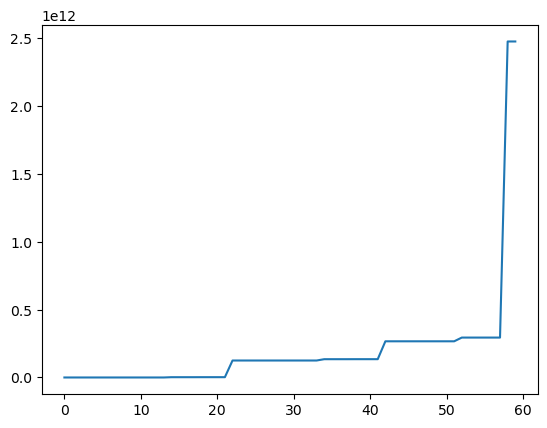

In [217]:
plt.plot(range(len(c[:60])), c[:60])

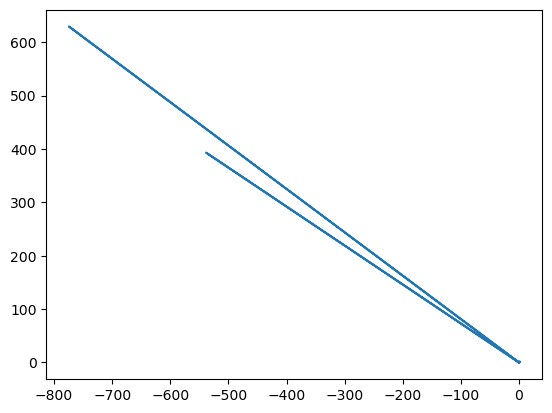

In [156]:
plt.plot(x_list[:15], y_list[:15])